#### Описание данных

Данные предоставляются в формате JSON на каждой строке следующего содержания:

*   word – таргет (слово, которое хотел ввести пользователь)
*   curve
    *   x – массив координат X
    *   y – массив координат Y
    *   t – массив временных меток (время в миллисекундах)
    *   grid – формат раскладким
        *   grid\_name – название раскладки (default или extra)
        *   width – ширина раскладки
        *   height – высота раскладки
        *   keys – массив клавиш
            *   label – символ клавиши
            *   hitbox – область нажатия
                *   x – координата X верхнего левого угла
                *   y – координата Y верхнего левого угла
                *   w – ширина области
                *   h – высота области

У клавиш `enter`, `space`, `globe`, `toNumberState`, `backspace` нет ключа 'label', но есть одноименный ключ 'action'

Было проверено, что:
* В train ровно 6000000 примеров
* Все примеры имеют line_data['curve']['grid']['grid_name'] либо 'default', либо 'extra', другого точно нет
* Все раскладки с одним именем одинаковы. То есть достаточно хранить один набор клавиш для каждой раскладки. Чтобы получить корректные hitbox'ы для данного примера нужно лишь умножить x и w на width_factor; y и h на height_factor, где:
    * height_factor = grid_height / template_grid_height
    * width_factor = grid_width / template_grid_width

**TODO**
* проверить распределение слов и процент покрытия, относительно всего словаря
* Кажется, из многих оюучающих примеров для default клавиатуры можно "деформировав пространство" сделать обучающие примеры для extra клавиатуры.
    * Интересно, нужно ли будет также деформировать время


In [ ]:
# n_lines = sum(1 for i in open(train_dataset_path, 'rb'))
# >>>> 6000000

In [ ]:
# from tqdm import tqdm
# gridnames = set()

# with open(train_dataset_path, encoding="utf-8") as f:
#     for line in tqdm(f, total = n_lines):
#         line_data = json.loads(line)
#         gridnames.add(line_data['curve']['grid']['grid_name'])

# print(gridnames)

# >>>> {'default', 'extra'}

In [5]:
import json
from typing import List, Set, Optional, Dict
import os

from tqdm import tqdm

In [52]:
N = 10
lines = []
with open("../../data/data/result_noctx_10k/train.jsonl", encoding="utf-8") as f:
    for _ in range(N):
        line = f.readline()
        lines.append(line)

In [38]:
lines

['{"word":"силе","curve":{"x":[306,306,307,316,337,374,440,487,548,583,619,656,688,703,725,743,755,764,771,773,770,758,707,656,626,529,470,418,394,327,327],"y":[398,398,398,395,391,386,389,397,410,415,410,398,383,374,353,332,316,302,286,281,272,260,235,214,202,158,127,97,82,43,43],"t":[0,7,24,62,64,81,108,125,142,158,175,194,208,224,241,258,275,293,308,325,341,359,375,394,411,426,443,459,475,494,499],"grid":{"width":1080,"height":667,"keys":[{"label":"й","hitbox":{"x":0,"y":15,"w":99,"h":154}},{"label":"ц","hitbox":{"x":98,"y":15,"w":99,"h":154}},{"label":"у","hitbox":{"x":196,"y":15,"w":100,"h":154}},{"label":"к","hitbox":{"x":295,"y":15,"w":99,"h":154}},{"label":"е","hitbox":{"x":393,"y":15,"w":99,"h":154}},{"label":"н","hitbox":{"x":491,"y":15,"w":99,"h":154}},{"label":"г","hitbox":{"x":589,"y":15,"w":99,"h":154}},{"label":"ш","hitbox":{"x":687,"y":15,"w":99,"h":154}},{"label":"щ","hitbox":{"x":785,"y":15,"w":100,"h":154}},{"label":"з","hitbox":{"x":884,"y":15,"w":99,"h":154}},{"lab

In [58]:
train_examples = list(json.loads(line) for line in lines)

In [74]:
curves = [train_example["curve"] for train_example in train_examples]

for curve in curves:
    assert len(curve["x"]) == len(curve["y"]) == len(curve["t"])

In [75]:
grids = [curve["grid"] for curve in curves]

In [78]:
grids[0]['grid_name']

'default'

In [76]:
for grid in grids:
    print(grid)

[{'width': 1080,
  'height': 667,
  'keys': [{'label': 'й', 'hitbox': {'x': 0, 'y': 15, 'w': 99, 'h': 154}},
   {'label': 'ц', 'hitbox': {'x': 98, 'y': 15, 'w': 99, 'h': 154}},
   {'label': 'у', 'hitbox': {'x': 196, 'y': 15, 'w': 100, 'h': 154}},
   {'label': 'к', 'hitbox': {'x': 295, 'y': 15, 'w': 99, 'h': 154}},
   {'label': 'е', 'hitbox': {'x': 393, 'y': 15, 'w': 99, 'h': 154}},
   {'label': 'н', 'hitbox': {'x': 491, 'y': 15, 'w': 99, 'h': 154}},
   {'label': 'г', 'hitbox': {'x': 589, 'y': 15, 'w': 99, 'h': 154}},
   {'label': 'ш', 'hitbox': {'x': 687, 'y': 15, 'w': 99, 'h': 154}},
   {'label': 'щ', 'hitbox': {'x': 785, 'y': 15, 'w': 100, 'h': 154}},
   {'label': 'з', 'hitbox': {'x': 884, 'y': 15, 'w': 99, 'h': 154}},
   {'label': 'х', 'hitbox': {'x': 982, 'y': 15, 'w': 98, 'h': 154}},
   {'label': 'ф', 'hitbox': {'x': 0, 'y': 169, 'w': 99, 'h': 154}},
   {'label': 'ы', 'hitbox': {'x': 98, 'y': 169, 'w': 99, 'h': 154}},
   {'label': 'в', 'hitbox': {'x': 196, 'y': 169, 'w': 100, 'h':

давайте кластеризуем данные по названиям grid'ов и проверим совпадают ли они. Ожидается, что есть два типа grid'ов и они полностью совпадают

In [3]:
train_dataset_path = "../../data/data/result_noctx_10k/train.jsonl"

In [85]:
n_lines = 6000000

In [88]:
# from tqdm import tqdm
# gridnames = set()

# with open(train_dataset_path, encoding="utf-8") as f:
#     for line in tqdm(f, total = n_lines):
#         line_data = json.loads(line)
#         gridnames.add(line_data['curve']['grid']['grid_name'])

# print(gridnames)

# >>>> {'default', 'extra'}

100%|██████████| 6000000/6000000 [1:36:43<00:00, 1033.81it/s]  


In [89]:
gridnames = {'default', 'extra'}

{'default', 'extra'}

*   grid\_name – название раскладки (default или extra)
*   width – ширина раскладки
*   height – высота раскладки
*   keys – массив клавиш
    *   label – символ клавиши
    *   hitbox – область нажатия
        *   x – координата X верхнего левого угла
        *   y – координата Y верхнего левого угла
        *   w – ширина области
        *   h – высота области

In [132]:
def is_same_deformed_grid(grid1: dict,
                          grid2: dict,
                          verbose: bool = False, 
                          verbose_different: bool = False):
    
    def print_all_hitbox_info(hb1, hb2):
        print('x: ', hb2['x'], hb1['x'] * w_factor)
        print('w: ', hb2['w'], hb1['w'] * w_factor)
        print('y: ', hb2['y'], hb1['y'] * h_factor)
        print('h: ', hb2['h'], hb1['h'] * h_factor)
        print()


    w_factor = grid2['width']/grid1['width']
    h_factor = grid2['height']/grid1['height']
    
    for key1, key2 in zip(grid1['keys'], grid2['keys']):
        hb1 = key1['hitbox']
        hb2 = key2['hitbox']

        keys_same = (
            hb2['x'] == hb1['x'] * w_factor and
            hb2['w'] == hb1['w'] * w_factor and
            hb2['y'] == hb1['y'] * h_factor and
            hb2['h'] == hb1['h'] * h_factor
        )

        if verbose or (verbose_different and not keys_same):
            print_all_hitbox_info(hb1, hb2)
            
        if not keys_same:
            return False
        
        
        
    return True

In [133]:
grid_templates = {gridname: None for gridname in gridnames}
grids_that_differ = {gridname: [] for gridname in gridnames}

# grids contain several examples of grids

for grid in grids:
    g_name = grid['grid_name']
    if grid_templates[g_name] is None:
        grid_templates[g_name] = grid
    
    if not is_same_deformed_grid(grid, grid_templates[g_name], verbose=True):
        grids_that_differ[g_name].append(grid)

x:  0 0.0
w:  99 99.0
y:  15 15.0
h:  154 154.0

x:  98 98.0
w:  99 99.0
y:  15 15.0
h:  154 154.0

x:  196 196.0
w:  100 100.0
y:  15 15.0
h:  154 154.0

x:  295 295.0
w:  99 99.0
y:  15 15.0
h:  154 154.0

x:  393 393.0
w:  99 99.0
y:  15 15.0
h:  154 154.0

x:  491 491.0
w:  99 99.0
y:  15 15.0
h:  154 154.0

x:  589 589.0
w:  99 99.0
y:  15 15.0
h:  154 154.0

x:  687 687.0
w:  99 99.0
y:  15 15.0
h:  154 154.0

x:  785 785.0
w:  100 100.0
y:  15 15.0
h:  154 154.0

x:  884 884.0
w:  99 99.0
y:  15 15.0
h:  154 154.0

x:  982 982.0
w:  98 98.0
y:  15 15.0
h:  154 154.0

x:  0 0.0
w:  99 99.0
y:  169 169.0
h:  154 154.0

x:  98 98.0
w:  99 99.0
y:  169 169.0
h:  154 154.0

x:  196 196.0
w:  100 100.0
y:  169 169.0
h:  154 154.0

x:  295 295.0
w:  99 99.0
y:  169 169.0
h:  154 154.0

x:  393 393.0
w:  99 99.0
y:  169 169.0
h:  154 154.0

x:  491 491.0
w:  99 99.0
y:  169 169.0
h:  154 154.0

x:  589 589.0
w:  99 99.0
y:  169 169.0
h:  154 154.0

x:  687 687.0
w:  99 99.0
y:  169 169.

In [134]:
gridnames = {'default', 'extra'}
n_lines = 6000000

def check_all_keyboards_same(data_path: str,
                             gridnames: Set[str],
                             n_lines:int,
                             verbose_different: bool = True):
    
    grid_templates = {gridname: None for gridname in gridnames}
    grids_that_differ = {gridname: [] for gridname in gridnames}

    with open(data_path, encoding="utf-8") as f:
        for i, line in tqdm(enumerate(f), total = n_lines):
            line_data = json.loads(line)

            grid = line_data['curve']['grid']
            g_name = grid['grid_name']
            
            if grid_templates[g_name] is None:
                grid_templates[g_name] = grid
            
            if not is_same_deformed_grid(grid,
                                         grid_templates[g_name],
                                         verbose_different = verbose_different):
                grids_that_differ[g_name].append((i, grid))
    return grids_that_differ

grids_that_differ = check_all_keyboards_same(train_dataset_path, gridnames, n_lines, verbose_different = True)

100%|██████████| 6000000/6000000 [25:59<00:00, 3847.57it/s] 


In [136]:
from typing import Dict, Tuple
from collections import defaultdict

def get_distributions(data_path: str,
                      gridnames: Set[str],
                      n_lines:int) -> Tuple[Dict[str, Dict[int, int]], Dict[str, Dict[int, int]]]:

    width_nums = {gridname: defaultdict(int) for gridname in gridnames}
    height_nums = {gridname: defaultdict(int) for gridname in gridnames}

    with open(data_path, encoding="utf-8") as f:
        for line in tqdm(f, total = n_lines):
            line_data = json.loads(line)

            grid = line_data['curve']['grid']
            g_name = grid['grid_name']

            width_nums[g_name][grid['width']] += 1
            height_nums[g_name][grid['height']] += 1
            
    return width_nums, height_nums

width_nums, height_nums = get_distributions(train_dataset_path, gridnames, n_lines)

100%|██████████| 6000000/6000000 [18:27<00:00, 5416.80it/s] 


In [137]:
print(width_nums)

{'extra': defaultdict(<class 'int'>, {1080: 373660}), 'default': defaultdict(<class 'int'>, {1080: 5626340})}


In [138]:
print(height_nums)

{'extra': defaultdict(<class 'int'>, {667: 373660}), 'default': defaultdict(<class 'int'>, {667: 5626340})}


In [3]:
def is_same_grid(grid1: dict, grid2: dict):
    """
    Given two grids (data['curve']['grid']),
    returns True if they are exactly the same.
    """
    same_name = grid1['grid_name'] == grid2['grid_name']
    if not same_name:
        return False
    
    same_height = grid1['height'] == grid2['height']
    if not same_height:
        return False
    
    same_width = grid1['width'] == grid2['width']
    if not same_width:
        return False
    
    for key1, key2 in zip(grid1['keys'], grid2['keys']):
        # I suppose that even the order of keys is the same.
        # If not, I will sort keys with lambda key: key['label']
        
        key1_dict_keys = set(key1.keys())
        possible_dict_keys_sets = [{'label', 'hitbox'}, {'action', 'hitbox'}]
        assert key1_dict_keys in possible_dict_keys_sets, f"Unexpected key1_dict_keys: {key1_dict_keys}"

        if key1_dict_keys != set(key2.keys()):
            return False
        
        if key1_dict_keys == {'label', 'hitbox'}:
            if key1['label'] != key2['label']:
                return False
        elif key1_dict_keys == {'action', 'hitbox'}:
            if key1['action'] != key2['action']:
                return False

        for hb_dict_key in ['x', 'y', 'w', 'h']:
            if key1['hitbox'][hb_dict_key] != key2['hitbox'][hb_dict_key]:
                return False
    
    return True

In [4]:
def compare_all_grids_same(datapaths: List[str],
                           gridnames: Set[str],
                           n_lines_list: List[Optional[int]] = None,
                           verbose_different: bool = True):
    
    grid_templates = {gridname: None for gridname in gridnames}
    grids_that_differ = {gridname: [] for gridname in gridnames}

    for datapath, n_lines in zip(datapaths, n_lines_list):
        with open(datapath, encoding="utf-8") as f:
            for i, line in tqdm(enumerate(f), total = n_lines):
                line_data = json.loads(line)

                grid = line_data['curve']['grid']
                g_name = grid['grid_name']

                if grid_templates[g_name] is None:
                    grid_templates[g_name] = grid

                if not is_same_grid(grid,
                                    grid_templates[g_name]):
                    grids_that_differ[g_name].append((datapath, i, grid))
                    if verbose_different:
                        print(f"Grid {g_name} differs in {datapath} at line {i}")
    
    return grids_that_differ

In [5]:
train_dataset_path = "../../data/data/result_noctx_10k/train.jsonl"
valid_dataset_path = "../../data/data/result_noctx_10k/valid.jsonl"
test_dataset_path = "../../data/data/result_noctx_10k/test.jsonl"

datapaths = [train_dataset_path, valid_dataset_path, test_dataset_path]

n_train_lines = 6000000
gridnames = {'default', 'extra'}

grids_that_differ = compare_all_grids_same(datapaths,
                                           gridnames,
                                           n_lines_list = [n_train_lines, None, None],
                                           verbose_different = True)

  0%|          | 252/6000000 [00:00<40:00, 2499.24it/s]

100%|██████████| 6000000/6000000 [33:44<00:00, 2963.53it/s]  
10000it [00:03, 2626.72it/s]
10000it [00:03, 3197.56it/s]


In [7]:
grids_that_differ

{'default': [], 'extra': []}

In [4]:
def compare_all_grids_same_using_strs(datapaths: List[str],
                                      end_strs: List[str],
                                      n_lines_list: List[int],
                                      verbose_different: bool = True):
    lines_with_different_grids = []
    for datapath, n_lines in zip(datapaths, n_lines_list):
        with open(datapath, encoding="utf-8") as f:
            for i, line in tqdm(enumerate(f), total = n_lines):
                if not (line.endswith(end_strs[0]) or line.endswith(end_strs[1])):
                    if verbose_different:
                        print(f"Grid differs in {datapath} at line {i}")
                        lines_with_different_grids.append((datapath, i, line))
    return lines_with_different_grids

In [5]:
train_dataset_path = "../../data/data/result_noctx_10k/train.jsonl"
valid_dataset_path = "../../data/data/result_noctx_10k/valid.jsonl"
test_dataset_path = "../../data/data/result_noctx_10k/test.jsonl"

datapaths = [train_dataset_path, valid_dataset_path, test_dataset_path]
n_train_lines = 6000000

compare_all_grids_same_using_strs(
    datapaths,
    end_strs=[
        '"grid":{"width":1080,"height":667,"keys":[{"label":"й","hitbox":{"x":0,"y":15,"w":99,"h":154}},{"label":"ц","hitbox":{"x":98,"y":15,"w":99,"h":154}},{"label":"у","hitbox":{"x":196,"y":15,"w":100,"h":154}},{"label":"к","hitbox":{"x":295,"y":15,"w":99,"h":154}},{"label":"е","hitbox":{"x":393,"y":15,"w":99,"h":154}},{"label":"н","hitbox":{"x":491,"y":15,"w":99,"h":154}},{"label":"г","hitbox":{"x":589,"y":15,"w":99,"h":154}},{"label":"ш","hitbox":{"x":687,"y":15,"w":99,"h":154}},{"label":"щ","hitbox":{"x":785,"y":15,"w":100,"h":154}},{"label":"з","hitbox":{"x":884,"y":15,"w":99,"h":154}},{"label":"х","hitbox":{"x":982,"y":15,"w":98,"h":154}},{"label":"ф","hitbox":{"x":0,"y":169,"w":99,"h":154}},{"label":"ы","hitbox":{"x":98,"y":169,"w":99,"h":154}},{"label":"в","hitbox":{"x":196,"y":169,"w":100,"h":154}},{"label":"а","hitbox":{"x":295,"y":169,"w":99,"h":154}},{"label":"п","hitbox":{"x":393,"y":169,"w":99,"h":154}},{"label":"р","hitbox":{"x":491,"y":169,"w":99,"h":154}},{"label":"о","hitbox":{"x":589,"y":169,"w":99,"h":154}},{"label":"л","hitbox":{"x":687,"y":169,"w":99,"h":154}},{"label":"д","hitbox":{"x":785,"y":169,"w":100,"h":154}},{"label":"ж","hitbox":{"x":884,"y":169,"w":99,"h":154}},{"label":"э","hitbox":{"x":982,"y":169,"w":98,"h":154}},{"action":"shift","hitbox":{"x":0,"y":323,"w":120,"h":154}},{"label":"я","hitbox":{"x":119,"y":323,"w":94,"h":154}},{"label":"ч","hitbox":{"x":212,"y":323,"w":95,"h":154}},{"label":"с","hitbox":{"x":306,"y":323,"w":94,"h":154}},{"label":"м","hitbox":{"x":399,"y":323,"w":95,"h":154}},{"label":"и","hitbox":{"x":493,"y":323,"w":94,"h":154}},{"label":"т","hitbox":{"x":586,"y":323,"w":95,"h":154}},{"label":"ь","hitbox":{"x":680,"y":323,"w":94,"h":154}},{"label":"б","hitbox":{"x":773,"y":323,"w":95,"h":154}},{"label":"ю","hitbox":{"x":867,"y":323,"w":95,"h":154}},{"action":"backspace","hitbox":{"x":961,"y":323,"w":119,"h":154}},{"action":"toNumberState","hitbox":{"x":0,"y":477,"w":141,"h":154}},{"action":"globe","hitbox":{"x":140,"y":477,"w":120,"h":154}},{"label":",","hitbox":{"x":259,"y":477,"w":98,"h":154}},{"action":"space","hitbox":{"x":356,"y":477,"w":455,"h":154}},{"label":".","hitbox":{"x":810,"y":477,"w":98,"h":154}},{"action":"enter","hitbox":{"x":907,"y":477,"w":173,"h":154}}],"grid_name":"default"}}}\n',
        '"grid":{"width":1080,"height":667,"keys":[{"label":"й","hitbox":{"x":0,"y":15,"w":91,"h":154}},{"label":"ц","hitbox":{"x":90,"y":15,"w":91,"h":154}},{"label":"у","hitbox":{"x":180,"y":15,"w":91,"h":154}},{"label":"к","hitbox":{"x":270,"y":15,"w":91,"h":154}},{"label":"е","hitbox":{"x":360,"y":15,"w":91,"h":154}},{"label":"н","hitbox":{"x":450,"y":15,"w":91,"h":154}},{"label":"г","hitbox":{"x":540,"y":15,"w":91,"h":154}},{"label":"ш","hitbox":{"x":630,"y":15,"w":91,"h":154}},{"label":"щ","hitbox":{"x":720,"y":15,"w":91,"h":154}},{"label":"з","hitbox":{"x":810,"y":15,"w":91,"h":154}},{"label":"х","hitbox":{"x":900,"y":15,"w":91,"h":154}},{"label":"ё","hitbox":{"x":990,"y":15,"w":90,"h":154}},{"label":"ф","hitbox":{"x":0,"y":169,"w":91,"h":154}},{"label":"ы","hitbox":{"x":90,"y":169,"w":91,"h":154}},{"label":"в","hitbox":{"x":180,"y":169,"w":91,"h":154}},{"label":"а","hitbox":{"x":270,"y":169,"w":91,"h":154}},{"label":"п","hitbox":{"x":360,"y":169,"w":91,"h":154}},{"label":"р","hitbox":{"x":450,"y":169,"w":91,"h":154}},{"label":"о","hitbox":{"x":540,"y":169,"w":91,"h":154}},{"label":"л","hitbox":{"x":630,"y":169,"w":91,"h":154}},{"label":"д","hitbox":{"x":720,"y":169,"w":91,"h":154}},{"label":"ж","hitbox":{"x":810,"y":169,"w":91,"h":154}},{"label":"э","hitbox":{"x":900,"y":169,"w":91,"h":154}},{"label":"ъ","hitbox":{"x":990,"y":169,"w":90,"h":154}},{"action":"shift","hitbox":{"x":0,"y":323,"w":91,"h":154}},{"label":"я","hitbox":{"x":90,"y":323,"w":91,"h":154}},{"label":"ч","hitbox":{"x":180,"y":323,"w":91,"h":154}},{"label":"с","hitbox":{"x":270,"y":323,"w":91,"h":154}},{"label":"м","hitbox":{"x":360,"y":323,"w":91,"h":154}},{"label":"и","hitbox":{"x":450,"y":323,"w":91,"h":154}},{"label":"т","hitbox":{"x":540,"y":323,"w":91,"h":154}},{"label":"ь","hitbox":{"x":630,"y":323,"w":91,"h":154}},{"label":"б","hitbox":{"x":720,"y":323,"w":91,"h":154}},{"label":"ю","hitbox":{"x":810,"y":323,"w":91,"h":154}},{"label":"?","hitbox":{"x":900,"y":323,"w":91,"h":154}},{"action":"backspace","hitbox":{"x":990,"y":323,"w":90,"h":154}},{"action":"toNumberState","hitbox":{"x":0,"y":477,"w":141,"h":154}},{"action":"globe","hitbox":{"x":140,"y":477,"w":120,"h":154}},{"label":",","hitbox":{"x":259,"y":477,"w":98,"h":154}},{"action":"space","hitbox":{"x":356,"y":477,"w":455,"h":154}},{"label":".","hitbox":{"x":810,"y":477,"w":98,"h":154}},{"action":"enter","hitbox":{"x":907,"y":477,"w":173,"h":154}}],"grid_name":"extra"}}}\n'
    ],
    n_lines_list = [n_train_lines, None, None],
)

  0%|          | 5141/6000000 [00:00<01:56, 51409.31it/s]

100%|██████████| 6000000/6000000 [02:06<00:00, 47248.93it/s]
10000it [00:00, 37453.52it/s]
10000it [00:00, 43668.42it/s]


[]

In [25]:
from typing import Set


def get_unique_chars(vocab_path: str) -> Set[str]:
    """Given a path to vocabulary returns a set of unique characters in it"""
    with open(vocab_path, encoding="utf-8") as f:
        vocab = f.read()
    return set(vocab)

In [26]:
vocab_path = r"..\..\data\data_separated_grid\voc.txt"
voc = get_unique_chars(vocab_path)

In [27]:
print(sorted(list(voc)))

['\n', '-', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я']


In [28]:
'ё' in voc

False

То есть у нас есть все буквы, кроме ё, а также "-"

Множество уникальных букв словаря возможных слов сосотоит из всех строчных букв русского языка, кроме "ё", а также "-"

Cловарь букв, генерируемых декодером, должен содержвать все буквы, кроме ё, а также ["-", "\<eos>", "\<pad>, "\<sos>"]

* pad не должен генерироваться, но должен иметь id, потому что будет использован ignore\_index в CrossEntropyLoss.
* sos не должен генерироваться, но должен иметь индекс, так как будет использоваться в качестве начального токена для декодера

In [29]:
import numpy as np
def get_max_output_len(vocab_path: str):
    """Given a path to vocabulary returns a maximum length of output sequence"""
    with open(vocab_path, encoding="utf-8") as f:
        vocab_str = f.read()
    vocab = vocab_str.split('\n')
    return vocab, np.argmax(np.array([len(word) for word in vocab])), max([len(word) for word in vocab])

In [30]:
vocab, argmax_word_len, max_word_len = get_max_output_len(vocab_path)

In [31]:
max_word_len

34

In [32]:
vocab[argmax_word_len]

'информационно-телекоммуникационной'

In [71]:
max_seq_len = max_word_len + 2  # with start and end tokens

In [67]:
if '\n' in voc:
    voc.remove('\n')

In [69]:
n_tokens = len(voc) + 2  # with start and end tokens

In [72]:
n_tokens, max_seq_len

(35, 36)

In [15]:
train_dataset_path = "../../data/data/result_noctx_10k/train.jsonl"
valid_dataset_path = "../../data/data/result_noctx_10k/valid.jsonl"
test_dataset_path = "../../data/data/result_noctx_10k/test.jsonl"

In [7]:
from typing import List, Optional

def get_trj_seq_lens(dataset_path: str, total: Optional[int] = None):
    """Given a path to dataset returns a list of trajectory lengths"""
    seq_lens = []
    with open(dataset_path, encoding="utf-8") as f:
        for line in tqdm(f, total = total):
            line_data = json.loads(line)
            trj_len = len(line_data['curve']['x'])
            seq_lens.append(trj_len)
    return seq_lens
            

In [10]:
train_seq_lens = get_trj_seq_lens(train_dataset_path, total = 6_000_000)

100%|██████████| 6000000/6000000 [15:31<00:00, 6441.15it/s] 


In [16]:
val_seq_lens = get_trj_seq_lens(valid_dataset_path)
test_seq_lens = get_trj_seq_lens(test_dataset_path)

10000it [00:02, 4784.61it/s]
10000it [00:01, 7352.93it/s]


In [17]:
max(train_seq_lens), max(val_seq_lens), max(test_seq_lens)

(299, 294, 283)

In [18]:
min(train_seq_lens), min(val_seq_lens), min(test_seq_lens)

(4, 4, 4)

In [43]:
# creates a sample dataset with 1000 lines from train dataset

def create_sample_dataset(dataset_path: str, sample_size: int, out_path: str):
    assert not os.path.exists(out_path), f"File {out_path} already exists!"
    with open(dataset_path, encoding="utf-8") as f, open(out_path, 'w', encoding="utf-8") as out_f:
        for i, line in tqdm(enumerate(f), total = sample_size):
            if i == sample_size:
                break
            out_f.write(line)

            

In [21]:
create_sample_dataset("../../data/data_separated_grid/train.jsonl", 1000, "../../data/data_separated_grid/sample_deleteme.jsonl")

100%|██████████| 1000/1000 [00:00<00:00, 27781.45it/s]


In [11]:
from typing import Dict, Optional
import os
import json

from tqdm import tqdm

def split_dataset_by_grid(dataset_path: str,
                          gridname_to_outpath: Dict[str, str],
                          total: Optional[int] = None):
    for out_path in gridname_to_outpath.values():
        if os.path.exists(out_path):
            raise ValueError(f"File {out_path} already exists!")

    with open(dataset_path, encoding="utf-8", ) as f:
        for line in tqdm(f, total = total):
            line_data = json.loads(line)
            grid_name = line_data['curve']['grid_name']
            out_path = gridname_to_outpath[grid_name]
            with open(out_path, 'a', encoding="utf-8") as out_f:
                out_f.write(line)

In [42]:
train_dataset_path = "../../data/data_separated_grid/train.jsonl"

gridname_to_outpath = {
    "default": "../../data/data_separated_grid/train__default_only.jsonl",
    "extra": "../../data/data_separated_grid/train__extra_only.jsonl"
}

split_dataset_by_grid(train_dataset_path, gridname_to_outpath, total = 6_000_000)

100%|██████████| 6000000/6000000 [1:15:08<00:00, 1330.80it/s] 


In [22]:
data_root = "../../data/data_separated_grid"
valid_dataset_path = os.path.join(data_root, "valid.jsonl")
valid_ref_path = os.path.join(data_root, "valid.ref")
valid_dataset_in_train_format_path = os.path.join(data_root, "valid__in_train_format.jsonl")

split_dataset_by_grid(
    valid_dataset_in_train_format_path,
    {
        "default": os.path.join(data_root, "valid__in_train_format__default_only.jsonl"),
        "extra": os.path.join(data_root, "valid__in_train_format__extra_only.jsonl")
    },
    total = 10_000)

100%|██████████| 10000/10000 [00:07<00:00, 1375.89it/s]


In [12]:
import os 

data_root = "../../data/data_separated_grid"
test_dataset_path = os.path.join(data_root, "test.jsonl")

split_dataset_by_grid(
    test_dataset_path,
    {
        "default": os.path.join(data_root, "test__default_only.jsonl"),
        "extra": os.path.join(data_root, "test__extra_only.jsonl")
    },
    total = 10_000)

  3%|▎         | 308/10000 [00:00<00:11, 811.31it/s] 

100%|██████████| 10000/10000 [00:15<00:00, 648.76it/s]


In [44]:
create_sample_dataset(
    "../../data/data_separated_grid/train__default_only.jsonl",
    1000,
    "../../data/data_separated_grid/sample_deleteme__default_only.jsonl")

100%|██████████| 1000/1000 [00:00<00:00, 55549.28it/s]


In [19]:
from typing import Optional
import os
import json

from tqdm import tqdm

def validation_dataset_to_train_format(dataset_path: str,
                                       ref_path: str,
                                       out_path: str,
                                       total: Optional[int] = None):
    
    if os.path.exists(out_path):
        raise ValueError(f"File {out_path} already exists!")
    
    with open(dataset_path, encoding="utf-8") as f:
        with open(ref_path, encoding="utf-8") as ref_f:
            with open(out_path, 'w', encoding="utf-8") as out_f:
                for line, ref_line in tqdm(zip(f, ref_f), total = total):
                    line_data = json.loads(line)
                    word = ref_line.rstrip('\n')
                    # This trick preserves the order of keys in the dict
                    # (which is not guaranteed). Preserving the order
                    # is not nessassary, but I decided to make the format
                    # of the dataset as close to the train dataset as possible.
                    # We could write line_data['word'] = word, but than 'word' 
                    # would be the last key in the dict.
                    line_data = {'word': word, **line_data}
                    json.dump(line_data,
                            out_f,
                            ensure_ascii=False,
                            separators=(',', ':'))
                    out_f.write('\n')

In [18]:
data_root = "../../data/data_separated_grid"
valid_dataset_path = os.path.join(data_root, "valid.jsonl")
valid_ref_path = os.path.join(data_root, "valid.ref")
valid_dataset_in_train_format_path = os.path.join(data_root, "valid__in_train_format.jsonl")

validation_dataset_to_train_format(
    valid_dataset_path,
    valid_ref_path,
    valid_dataset_in_train_format_path,
    total = 10_000)

10000it [00:03, 2998.20it/s]                        


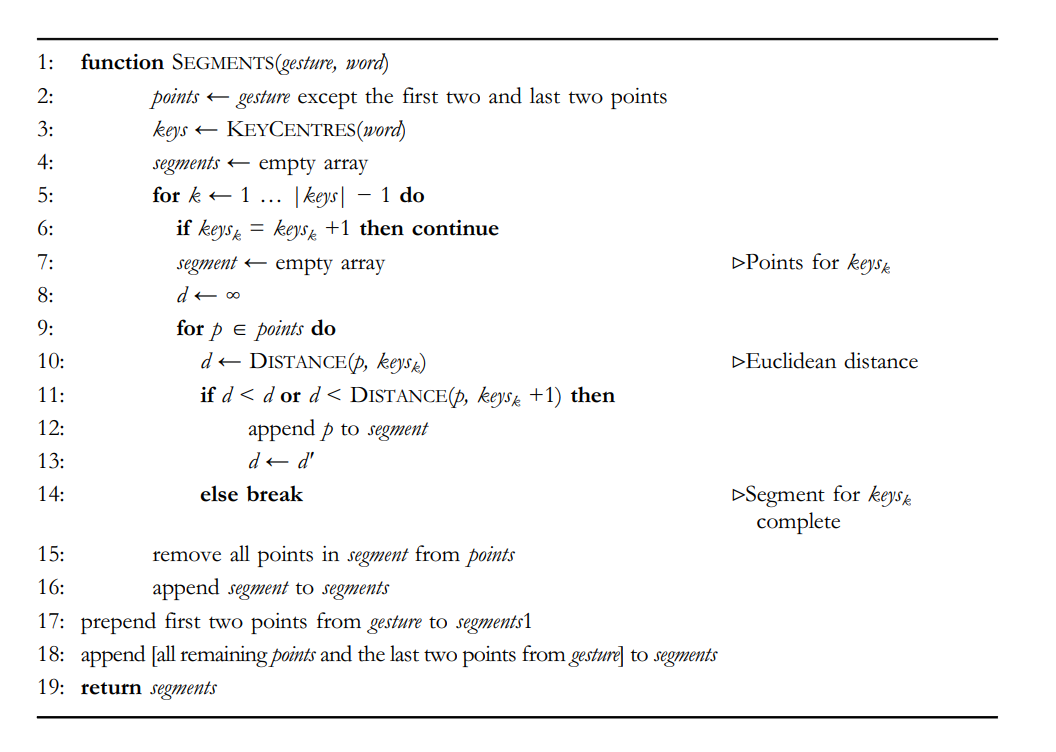

In [25]:
from typing import List, Tuple, Dict, Optional
import os
import json

from tqdm import tqdm

def monotoniacally_increases(time: List[int]) -> bool:
    for i, t in enumerate(time[1:], 1):
        if t <= time[i-1]:
            return False
    return True


def get_kb_key_center(hitbox: Dict[str, int]) -> float:
    x = hitbox['x'] + hitbox['w'] / 2
    y = hitbox['y'] + hitbox['h'] / 2
    return x, y


def distance(x1, y1, x2, y2) -> float:
    return ((x2 - x1)**2 + (y2 - y1)**2)**0.5


def points_not_too_far(x_list: List[int],
                       y_list: List[int],
                       kb_keys: dict,
                       max_dist: int) -> bool:
    for x, y in zip(x_list, y_list):
        not_too_far = False
        for key in kb_keys:
            key_x, key_y = get_kb_key_center(key['hitbox'])
            dist = distance(x, y, key_x, key_y)
            if dist < max_dist:
                not_too_far = True
                break
        if not not_too_far:
            return False
    return True  


def get_label2key(kb_keys: dict,
                  substitutions: dict = None) -> dict:
    """
    Arguments:
    ----------
    substitutions: dict
        Dict with keys being labels that are may be absent in grid
        and values being labels that should be used instead. 
        For example, {'ъ': 'ь', 'ё': 'е'}. If there is no 'ё' in grid,
        users swipes over 'е' instead.
    """
    if substitutions is None:
        substitutions = {'ъ': 'ь', 'ё': 'е'}

    label2key = {}
    for key in kb_keys:
        if 'label' not in key:
            continue
        label2key[key['label']] = key  # since i don't plan edditing keys, i don do keys.copy()
    for potentially_missing_label in substitutions.keys():
        if potentially_missing_label not in label2key:
            label2key[potentially_missing_label] = label2key[substitutions[potentially_missing_label]]
    return label2key


def get_segments(tdt_word: str,
                 x_list: List[int],
                 y_list: List[int],
                 label2key: Dict[str, dict]) -> List[Tuple[int, int]]:
    segments = []

    points = list(zip(x_list[2:-2], y_list[2:-2]))
    # print(points)
    p_i = 0

    keys = []
    for c in tdt_word:
        if c not in label2key:
            if c not in ['-']:
                print(f"Warning: `{c}` not in label2key")
            continue
        keys.append(get_kb_key_center(label2key[c]['hitbox']))

    # keys = [get_kb_key_center(label2key[c]['hitbox']) for c in tdt_word]
    
    for k_i, k in enumerate(keys[:-1]):
        if k == keys[k_i + 1]:
            continue
        segment = []
        prev_d = float('inf')

        k_x, k_y = k
        next_k_x, next_k_y = keys[k_i + 1]
        
        for x, y in points[p_i:]:
            d = distance(x, y, k_x, k_y)
            if d < prev_d or d < distance(x, y, next_k_x, next_k_y):
                segment.append((x, y))
                prev_d = d
            else:
                break
        segments.append(segment)
        p_i += len(segment)  # remove all points in segment from points

    if not segments:  
        # The word had of only one unique charracter.
        # Example: 'ее' which is a way to type 'её'.
        segments.append(list(zip(x_list, y_list)))
        return segments

    segments[0] = list(zip(x_list[:2], y_list[:2])) + segments[0]
    last_two_points = list(zip(x_list[-2:], y_list[-2:]))
    # points[p_i:].extend(last_two_points) is None :(
    segments.append(points[p_i:] + last_two_points)
    return segments


def n_segments_is_correct(tgt_word, segments):
    # тут не учтено, что в слове нужно произвести замены (например, 'ъ' на 'ь', 'ё' на 'е')
    # а также удалить пунктуацию (вроде бы только дефис)
    # причем удаление и замены нужно делать до того, как делать colapsed word,
    # иначе примеры вроде из-за будут ломать проверку
    word_without_hyphen = ""
    for c in tgt_word:
        if c != '-':
            word_without_hyphen += c
    
    collapsed_word = ""
    for i, c in enumerate(word_without_hyphen):
        if (i < (len(word_without_hyphen) - 1) and c == word_without_hyphen[i+1]):
            continue
        collapsed_word += c

    if len(segments) != len(collapsed_word):
        print(collapsed_word)

    return len(segments) == len(collapsed_word)



def over_two_points_in_each_segment(tgt_word: str,
                                    x: List[int],
                                    y: List[int],
                                    label2key: dict) -> bool:
    threshold_len = 2
    segments = get_segments(tgt_word, x, y, label2key)

    if not n_segments_is_correct(tgt_word, segments):
        print(f"Warning: n_segments = {len(segments)} for {tgt_word} and {segments}")
    
    for segment in segments:
        if len(segment) < threshold_len:
            return False
    return True


def create_dataset_without_errors(dataset_path: str,
                                  out_path: str,
                                  max_dist: int,
                                  grids: Dict[str, dict] = None,
                                  total: Optional[int] = None) -> List[Tuple[int, str]]:
    """
    Creates a version of a given dataset with invalid data filtered out.

    Arguments:
    ----------
    grids: str
        Dict with `grid names` as keys and `grids` as values.
        If grids is None
            it's supposed that the dataset is in original
            format (curves in the dataset don't have
            grid_name attribute, but have grid attribute with
            full grid information).
        Else
            Curves have grid_name attribute and don't have 
            grid attribute
    """
    if os.path.exists(out_path):
        raise ValueError(f"File {out_path} already exists!")
    
    error_idxs = []
    with open(dataset_path, encoding="utf-8") as f:
        for i, line in tqdm(enumerate(f), total = total):
            line_data = json.loads(line)

            c = line_data['curve']
            x, y, t = c['x'], c['y'], c['t']
            if grids is not None:
                kb_keys = grids[c['grid_name']]['keys']
            else:
                kb_keys = c['grid']['keys']

            has_error = (not monotoniacally_increases(t) or
                         not points_not_too_far(x, y, kb_keys, max_dist) or
                         not over_two_points_in_each_segment(
                             line_data['word'], x, y, get_label2key(kb_keys))
            )

            if has_error:
                error_idxs.append((i, line))
                continue

            with open(out_path, 'a', encoding="utf-8") as out_f:
                out_f.write(line)
    
    return error_idxs




def create_dataset_without_errors_except_segments_check(dataset_path: str,
                                                        out_path: str,
                                                        max_dist: int,
                                                        grids: Dict[str, dict] = None,
                                                        total: Optional[int] = None) -> List[int]:
    if os.path.exists(out_path):
        raise ValueError(f"File {out_path} already exists!")
    
    error_idxs = []
    with open(dataset_path, encoding="utf-8") as f:
        for i, line in tqdm(enumerate(f), total = total):
            line_data = json.loads(line)

            c = line_data['curve']
            x, y, t = c['x'], c['y'], c['t']
            if grids is not None:
                kb_keys = grids[c['grid_name']]['keys']
            else:
                kb_keys = c['grid']['keys']

            has_error = (not monotoniacally_increases(t) or
                         not points_not_too_far(x, y, kb_keys, max_dist)
            )

            if has_error:
                error_idxs.append(i)
                continue

            with open(out_path, 'a', encoding="utf-8") as out_f:
                out_f.write(line)
    
    return error_idxs

In [2]:
data = json.loads('{"word":"ее","curve":{"x":[437,437,434,433,433],"y":[60,60,60,59,59],"t":[0,7,76,461,503],"grid_name":"default"}}')

c = data['curve']

grids_path = "../../data/data_separated_grid/gridname_to_grid.json"
with open(grids_path , encoding="utf-8") as f:
    grids = json.load(f)

segments = get_segments(data['word'], c['x'], c['y'], get_label2key(grids[c['grid_name']]['keys']))

segments, data['word']

([[(437, 60), (437, 60), (434, 60), (433, 59), (433, 59)]], 'ее')

In [3]:
# test get_segments

import json

from tqdm import tqdm


data_path = "../../data/data_separated_grid/sample_deleteme__default_only.jsonl"
grids_path = "../../data/data_separated_grid/gridname_to_grid.json"

with open(grids_path , encoding="utf-8") as f:
    grids = json.load(f)

data_examples = []

with open(data_path, encoding="utf-8") as f:
    for line in tqdm(f):
        data_examples.append(json.loads(line))

1000it [00:00, 14705.92it/s]


In [4]:
data = data_examples[3]
c = data['curve']
segments = get_segments(data['word'], c['x'], c['y'], get_label2key(grids[c['grid_name']]['keys']))

In [5]:
print(data['word'])

как


In [6]:
sum(len(s) for s in segments), len(c['x'])

(23, 23)

In [7]:
len(segments), len(data['word'])

(3, 3)

In [8]:
print(list(zip(c['x'], c['y'])))
print(segments)

[(348, 113), (348, 121), (353, 165), (361, 219), (367, 256), (371, 278), (375, 291), (377, 300), (379, 304), (379, 305), (378, 300), (375, 289), (369, 269), (361, 239), (354, 207), (348, 179), (345, 158), (343, 139), (342, 125), (342, 113), (343, 104), (343, 98), (343, 98)]
[[(348, 113), (348, 121), (353, 165)], [(361, 219), (367, 256), (371, 278), (375, 291), (377, 300), (379, 304), (379, 305), (378, 300), (375, 289), (369, 269), (361, 239), (354, 207), (348, 179)], [(345, 158), (343, 139), (342, 125), (342, 113), (343, 104), (343, 98), (343, 98)]]


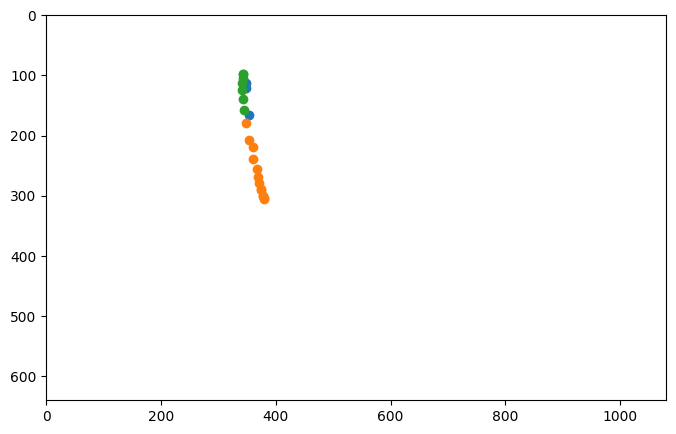

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(1080//128, 640//128))
plt.xlim((0, 1080))
plt.ylim((0,640))
plt.gca().invert_yaxis()



for segment in segments:
    segment = np.array(segment)
    plt.plot(segment[:, 0], segment[:, 1], 'o')
    

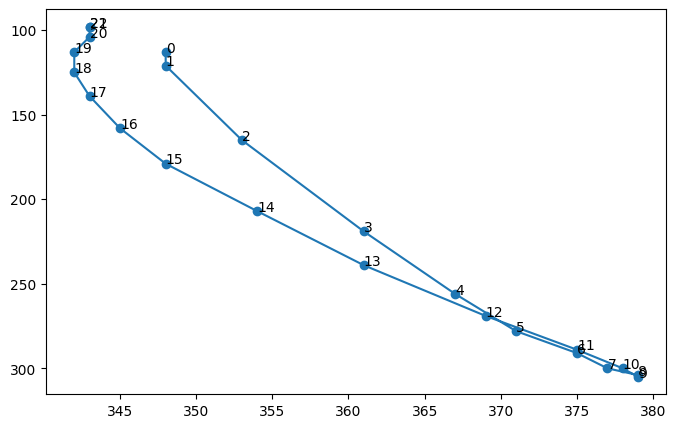

In [21]:

plt.figure(figsize=(1080//128, 640//128))
# plt.xlim((0, 1080))
# plt.ylim((0,640))
plt.gca().invert_yaxis()

plt.scatter(c['x'], c['y'])
plt.plot(c['x'], c['y'])
for i, (x, y) in enumerate(zip(c['x'], c['y'])):
    plt.text(x,y,i)


In [123]:
label2key = get_label2key(grids['default']['keys'])
max_dist  = distance(*get_kb_key_center(label2key['ф']['hitbox']),
         *get_kb_key_center(label2key['ц']['hitbox'])
)
max_dist

182.53766734567415

In [130]:
get_kb_key_center(label2key['й']['hitbox'])

(49.5, 92.0)

In [125]:
get_kb_key_center(label2key['ф']['hitbox'])

(49.5, 246.0)

In [126]:
get_kb_key_center(label2key['ц']['hitbox'])

(147.5, 92.0)

In [129]:
grids['default']['height'], grids['default']['width']

(667, 1080)

In [2]:
from datetime import datetime
cur_time = "{:%Y_%m_%d__%H_%M_%S}".format(datetime.now())


grids_path = "../../data/data_separated_grid/gridname_to_grid.json"
with open(grids_path , encoding="utf-8") as f:
    grids = json.load(f)


label2key = get_label2key(grids['default']['keys'])
max_dist  = distance(
    *get_kb_key_center(label2key['ф']['hitbox']),
    *get_kb_key_center(label2key['ц']['hitbox'])
)

errors = create_dataset_without_errors(
    dataset_path="../../data/data_separated_grid/train__default_only.jsonl",
    out_path=f"../../data/data_separated_grid/train__default_only_no_errors__{cur_time}.jsonl",
    max_dist = max_dist,
    grids = grids,
    total = 5_626_340)

  0%|          | 40/5626340 [00:00<3:59:07, 392.14it/s]

100%|██████████| 5626340/5626340 [2:40:00<00:00, 586.04it/s]  


In [4]:
len(errors)

388756

In [5]:
print(len(errors)/5_626_340*100)

6.909571764237497


In [8]:
import pickle

errors_List_save_path = "../../data/data_separated_grid/train__default_only__errors_list.pkl"

with open(errors_List_save_path, 'wb') as f:
    pickle.dump(errors, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(errors_List_save_path, 'rb') as f:
    errors_loaded = pickle.load(f)

print(errors == errors_loaded)

True


In [26]:
from datetime import datetime
cur_time = "{:%Y_%m_%d__%H_%M_%S}".format(datetime.now())

data_root = "../../data/data_separated_grid"
grids_path = os.path.join(data_root, "gridname_to_grid.json")
with open(grids_path , encoding="utf-8") as f:
    grids = json.load(f)


label2key = get_label2key(grids['extra']['keys'])
max_dist  = distance(
    *get_kb_key_center(label2key['ф']['hitbox']),
    *get_kb_key_center(label2key['ц']['hitbox'])
)

errors = create_dataset_without_errors(
    dataset_path=os.path.join(data_root, "train__extra_only.jsonl"),
    out_path=os.path.join(data_root, f"train__extra_only_no_errors__{cur_time}.jsonl"),
    max_dist = max_dist,
    grids = grids,
    total = 373_660)

  0%|          | 80/626340 [00:00<52:26, 199.05it/s]

 60%|█████▉    | 373660/626340 [39:56<27:00, 155.92it/s]  


In [27]:
len(errors), len(errors)/373_660*100

(24488, 6.553551356848472)

In [28]:
import pickle

errors_List_save_path = os.path.join(data_root, "train__extra_only__errors_list.pkl")

with open(errors_List_save_path, 'wb') as f:
    pickle.dump(errors, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(errors_List_save_path, 'rb') as f:
    errors_loaded = pickle.load(f)

print(errors == errors_loaded)

True
